In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("Dataset/heart.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


## Continous features

In [5]:
df.groupby(['HeartDisease']).mean()  #heart dieases chance according to age

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
HeartDisease,,,,,,
0,50.551220,130.180488,227.121951,0.107317,148.151220,0.408049
1,55.899606,134.185039,175.940945,0.334646,127.655512,1.274213


In [6]:
print(df['Age'].min(),df['Age'].max())

28 77


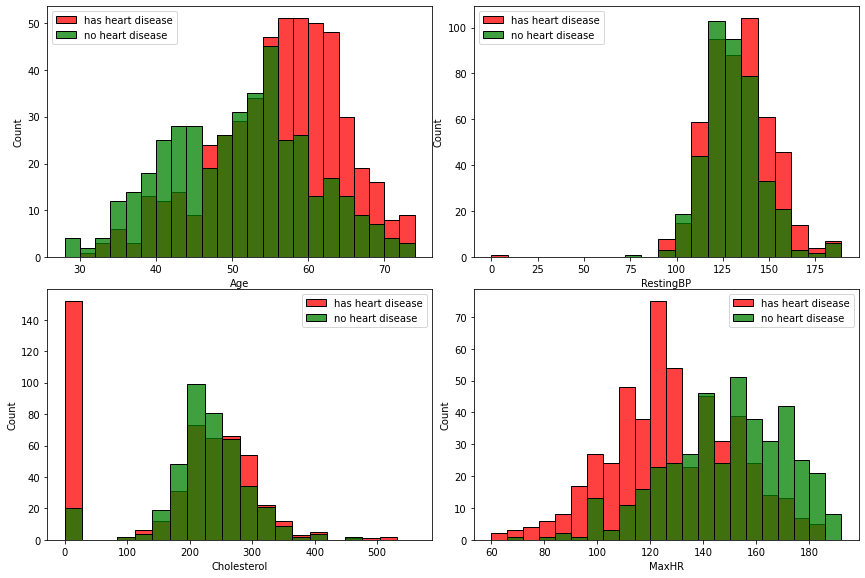

In [7]:
fig,axes = plt.subplots(2,2, figsize= (12,8))
fig.tight_layout()

features =['Age','RestingBP','Cholesterol','MaxHR']
titles = ['Age','Blood Pressure','Cholesterol','Heart Rate Max']

for f,ax,t in zip(features, axes.flatten(), titles):
    has_hd= df.loc[df['HeartDisease']== 1,f]
    no_hd= df.loc[df['HeartDisease'] == 0,f]
    min_x= min(has_hd.min(),no_hd.min())
    max_x= min(has_hd.max(),no_hd.max())
    bins = (max_x - min_x) // 20
    sns.histplot(has_hd, color='r',bins=np.arange(min_x,max_x,bins),label='has heart disease',ax=ax)
    sns.histplot(no_hd, color='g',bins=np.arange(min_x,max_x,bins),label='no heart disease',ax=ax)
    ax.legend()

### Insights 
* +55 has higher likelihood of getting heartdiesase
* low MaxHR has higher likelihood of getting heartdiesase
* RestingBP is not a good feature for prediction
* Cholesterol data is missing discriminately



## Categorical features

In [8]:
df.groupby(['Sex']).mean()['HeartDisease']  # .mean ==> probability (for binary only)

Sex
F    0.259067
M    0.631724
Name: HeartDisease, dtype: float64

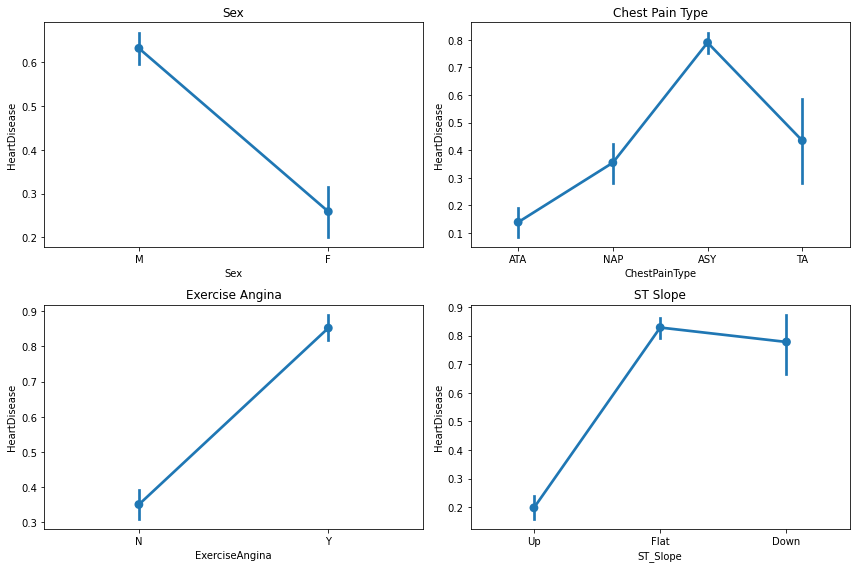

In [9]:
fig,axes = plt.subplots(2,2, figsize= (12,8))

features =['Sex','ChestPainType','ExerciseAngina','ST_Slope']
titles = ['Sex','Chest Pain Type','Exercise Angina','ST Slope']

for f,ax,t in zip(features, axes.flatten(), titles):
    
    sns.pointplot(x= f,y= 'HeartDisease',data = df, ax = ax)
    ax.set_title(t)
    
fig.tight_layout()

#### Insights

* Male has high likelihood of heartdisease
* Asymptomatic(ASY) chest pain type has high likelihood of heartdisease
* People with angina after exercise give a high likelihood of heartdisease
* people with up ST slope have low likelihood of heartdisease

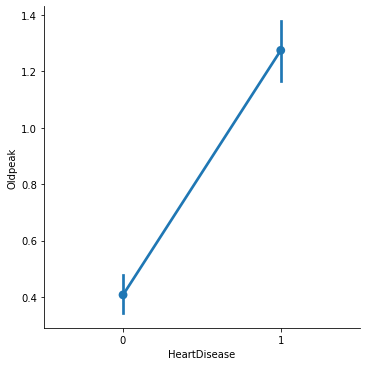

In [10]:
sns.catplot(x='HeartDisease', y='Oldpeak', kind='point', data=df);

# Tranformation and Cleaning

In [50]:
df_clean = pd.DataFrame()

# Tranform Categorical Data
df_clean['Female?'] = np.where(df['Sex'] == 'F', 1, 0)
#df_clean['ASYPain?'] = np.where(df['ChestPainType'] == 'ASY', 1, 0)
df_clean['ChestPain'] = df['ChestPainType'].map({'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3})
df_clean['HasAngina?'] = np.where(df['ExerciseAngina'] == 'Y', 1, 0)
df_clean['UpST?'] = np.where(df['ST_Slope'] == 'Up', 1, 0)

# Transform Continuos Data
df_clean['Old?'] = np.where(df['Age'] > 53, 1, 0)
# df_clean['Age'] =  df['Age']
df_clean['LowHR?'] = np.where(df['MaxHR'] < 135, 1, 0)
df_clean['MissingCholesterol?'] = np.where(df['Cholesterol'] == 0, 1, 0)
df_clean['HighOldPeak?'] = np.where(df['Oldpeak'] > 1.2, 1, 0)

df_clean['HD?'] = df['HeartDisease']

df_clean.head()

,Female?,ChestPain,HasAngina?,UpST?,Old?,LowHR?,MissingCholesterol?,HighOldPeak?,HD?
0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,1
2,0,0,0,1,0,1,0,0,0
3,1,2,1,0,0,1,0,1,1
4,0,1,0,1,1,1,0,0,0


<AxesSubplot:>

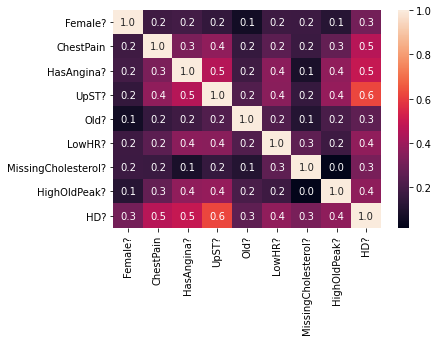

In [51]:
sns.heatmap(np.abs(df_clean.corr()), annot=True, fmt='.1f')

In [53]:
df_clean.groupby('ChestPain').mean()['HD?']

ChestPain
0    0.138728
1    0.354680
2    0.790323
3    0.434783
Name: HD?, dtype: float64

In [54]:
df_clean.groupby('HD?').mean()

,Female?,ChestPain,HasAngina?,UpST?,Old?,LowHR?,MissingCholesterol?,HighOldPeak?
HD?,,,,,,,,
0,0.348780,1.017073,0.134146,0.773171,0.40000,0.253659,0.048780,0.134146
1,0.098425,1.803150,0.622047,0.153543,0.65748,0.627953,0.299213,0.482283


# Exploring Train Data

In [55]:
from sklearn.model_selection import train_test_split

features = df_clean.drop(columns=['HD?'])
labels = df_clean['HD?']

x_train, x_test, y_train, y_test = train_test_split(features, labels, random_state=42, test_size=0.4)
x_val, x_test, y_val, y_test = train_test_split(features, labels, random_state=42, test_size=0.5)

# Training a Basic Model

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')

In [57]:
def print_results(results):
    print(f'BEST PARAMS: {results.best_params_}\n')
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print(f'{round(mean, 3)} (+/-{round(std*2, 3)}) for {params}')

In [58]:
#Training - 'the best parameter'

rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 100, 150],
    'max_depth': [2, 10, 20, 30, None]
}

cv = GridSearchCV(rf, parameters, cv=10)
cv.fit(x_train, y_train.values)
print_results(cv)

BEST PARAMS: {'max_depth': 2, 'n_estimators': 100}

0.822 (+/-0.11) for {'max_depth': 2, 'n_estimators': 5}
0.853 (+/-0.091) for {'max_depth': 2, 'n_estimators': 50}
0.856 (+/-0.084) for {'max_depth': 2, 'n_estimators': 100}
0.855 (+/-0.083) for {'max_depth': 2, 'n_estimators': 150}
0.831 (+/-0.088) for {'max_depth': 10, 'n_estimators': 5}
0.842 (+/-0.105) for {'max_depth': 10, 'n_estimators': 50}
0.853 (+/-0.112) for {'max_depth': 10, 'n_estimators': 100}
0.847 (+/-0.111) for {'max_depth': 10, 'n_estimators': 150}
0.831 (+/-0.102) for {'max_depth': 20, 'n_estimators': 5}
0.844 (+/-0.112) for {'max_depth': 20, 'n_estimators': 50}
0.842 (+/-0.103) for {'max_depth': 20, 'n_estimators': 100}
0.842 (+/-0.109) for {'max_depth': 20, 'n_estimators': 150}
0.838 (+/-0.116) for {'max_depth': 30, 'n_estimators': 5}
0.84 (+/-0.12) for {'max_depth': 30, 'n_estimators': 50}
0.849 (+/-0.091) for {'max_depth': 30, 'n_estimators': 100}
0.849 (+/-0.109) for {'max_depth': 30, 'n_estimators': 150}
0.836 (

In [59]:
knn = KNeighborsClassifier()
parameters = {
    'n_neighbors': [1, 5, 10, 100]
}

cv = GridSearchCV(knn, parameters, cv=10)
cv.fit(x_train, y_train.values)
print_results(cv)

BEST PARAMS: {'n_neighbors': 5}

0.764 (+/-0.142) for {'n_neighbors': 1}
0.851 (+/-0.087) for {'n_neighbors': 5}
0.84 (+/-0.097) for {'n_neighbors': 10}
0.838 (+/-0.107) for {'n_neighbors': 100}


In [60]:
svc = LinearSVC()
parameters = {'C' : [0.001, 0.01, 0.1, 1, 10, 100]}

cv = GridSearchCV(svc, parameters, cv=10)
cv.fit(x_train, y_train.values)
print_results(cv)

BEST PARAMS: {'C': 0.1}

0.835 (+/-0.111) for {'C': 0.001}
0.855 (+/-0.083) for {'C': 0.01}
0.86 (+/-0.081) for {'C': 0.1}
0.86 (+/-0.081) for {'C': 1}
0.856 (+/-0.084) for {'C': 10}
0.82 (+/-0.136) for {'C': 100}


In [61]:
#validation -> finding best classifer(model)
mdl1 = RandomForestClassifier(max_depth= 2, n_estimators=100)
mdl1.fit(x_train, y_train)
mdl2 = KNeighborsClassifier(n_neighbors=5)
mdl2.fit(x_train, y_train)
mdl3 = LinearSVC(C=0.1)
mdl3.fit(x_train, y_train)
model_names = ['Random Forest', 'KNN', 'Linear SVC']
for mdl, name in zip([mdl1, mdl2, mdl3], model_names):
    y_pred = mdl.predict(x_val)
    accuracy = round(accuracy_score(y_val, y_pred), 3)
    precision = round(precision_score(y_val, y_pred), 3)
    recall = round(recall_score(y_val, y_pred), 3)
    
    print(f'{name}: -- A: {accuracy} / P: {precision} / R: {recall}')

Random Forest: -- A: 0.843 / P: 0.82 / R: 0.901
KNN: -- A: 0.876 / P: 0.863 / R: 0.909
Linear SVC: -- A: 0.85 / P: 0.843 / R: 0.881


Accuracy = # of asweres that are actually 1 / # of asweres we said 1

Precision = # of asweres we said 1 / # of answers that we said are 1 and is actually 1 (How confident are we on our decision)

Recall = (What is the probability that we guess the correct answer)

# Testing

In [62]:
x_train = pd.concat([x_train, x_val])
y_train = pd.concat([y_train, y_val])

mdl = KNeighborsClassifier(n_neighbors=5)
mdl.fit(x_train, y_train)

y_pred = mdl.predict(x_test)
accuracy = round(accuracy_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)
recall = round(recall_score(y_test, y_pred), 3)

print(f'-- A: {accuracy} / P: {precision} / R: {recall}')

-- A: 0.861 / P: 0.91 / R: 0.842
